In [3]:
import pandas as pd
import json

In [62]:
df = pd.read_csv("characters.csv", header=0)

In [63]:
df

,character,Ant-Man,Avengers: Age of Ultron,Avengers: Endgame,Avengers: Infinity War,Black Panther,Captain America: Civil War,Captain America: The First Avenger,Captain America: The Winter Soldier,Captain Marvel,Guardians of the Galaxy Vol. 2,Iron Man,Iron Man 2,Iron Man 3,Spider-Man: Homecoming,The Avengers,Thor,Thor: Ragnarok,Thor: The Dark World
0,TONY STARK,0,173,137,119,0,165,0,0,0,0,252,335,358,74,152,0,0,0
1,STEVE ROGERS,3,133,119,25,0,154,186,218,3,0,0,0,0,7,121,0,0,0
2,THOR,0,55,70,74,0,0,0,0,0,0,0,0,0,0,47,166,289,133
3,PETER PARKER,0,0,7,39,0,73,0,0,0,0,0,0,0,402,0,0,0,0
4,NATASHA ROMANOFF,1,79,69,15,0,64,0,112,3,0,0,55,0,0,97,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,STRIKE AGENT #3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
648,TALL RAVAGER,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
649,TENT KIDS,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
650,THOMAS RICHARDS,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [25]:
data = {}

for i in range(len(df)):
    array = []
    for column in df.columns:
        if column == "character":
            data[df.iloc[i]["character"]] = []
        else:
            array.append({column:int(df.iloc[0][column])})
    data[df.iloc[i]["character"]] = array
    


In [11]:
data

NameError: name 'data' is not defined

In [12]:
with open('characters.json', 'w') as file:
    json.dump(data, file)

NameError: name 'data' is not defined

In [209]:
df = pd.read_csv("characters.csv", header=0)
colunas = df[['character', 'Avengers: Infinity War']]
df = df.filter(items=colunas)
filmes = colunas.columns.difference(['character'])
df = df[(df[filmes] != 0).any(axis=1)]
personagens = df['character'].loc[~(df==0).all(axis=1)]
numero_personagens = personagens.count()
numero_filmes = len(filmes)
numero_nos = numero_personagens + numero_filmes
# filmes

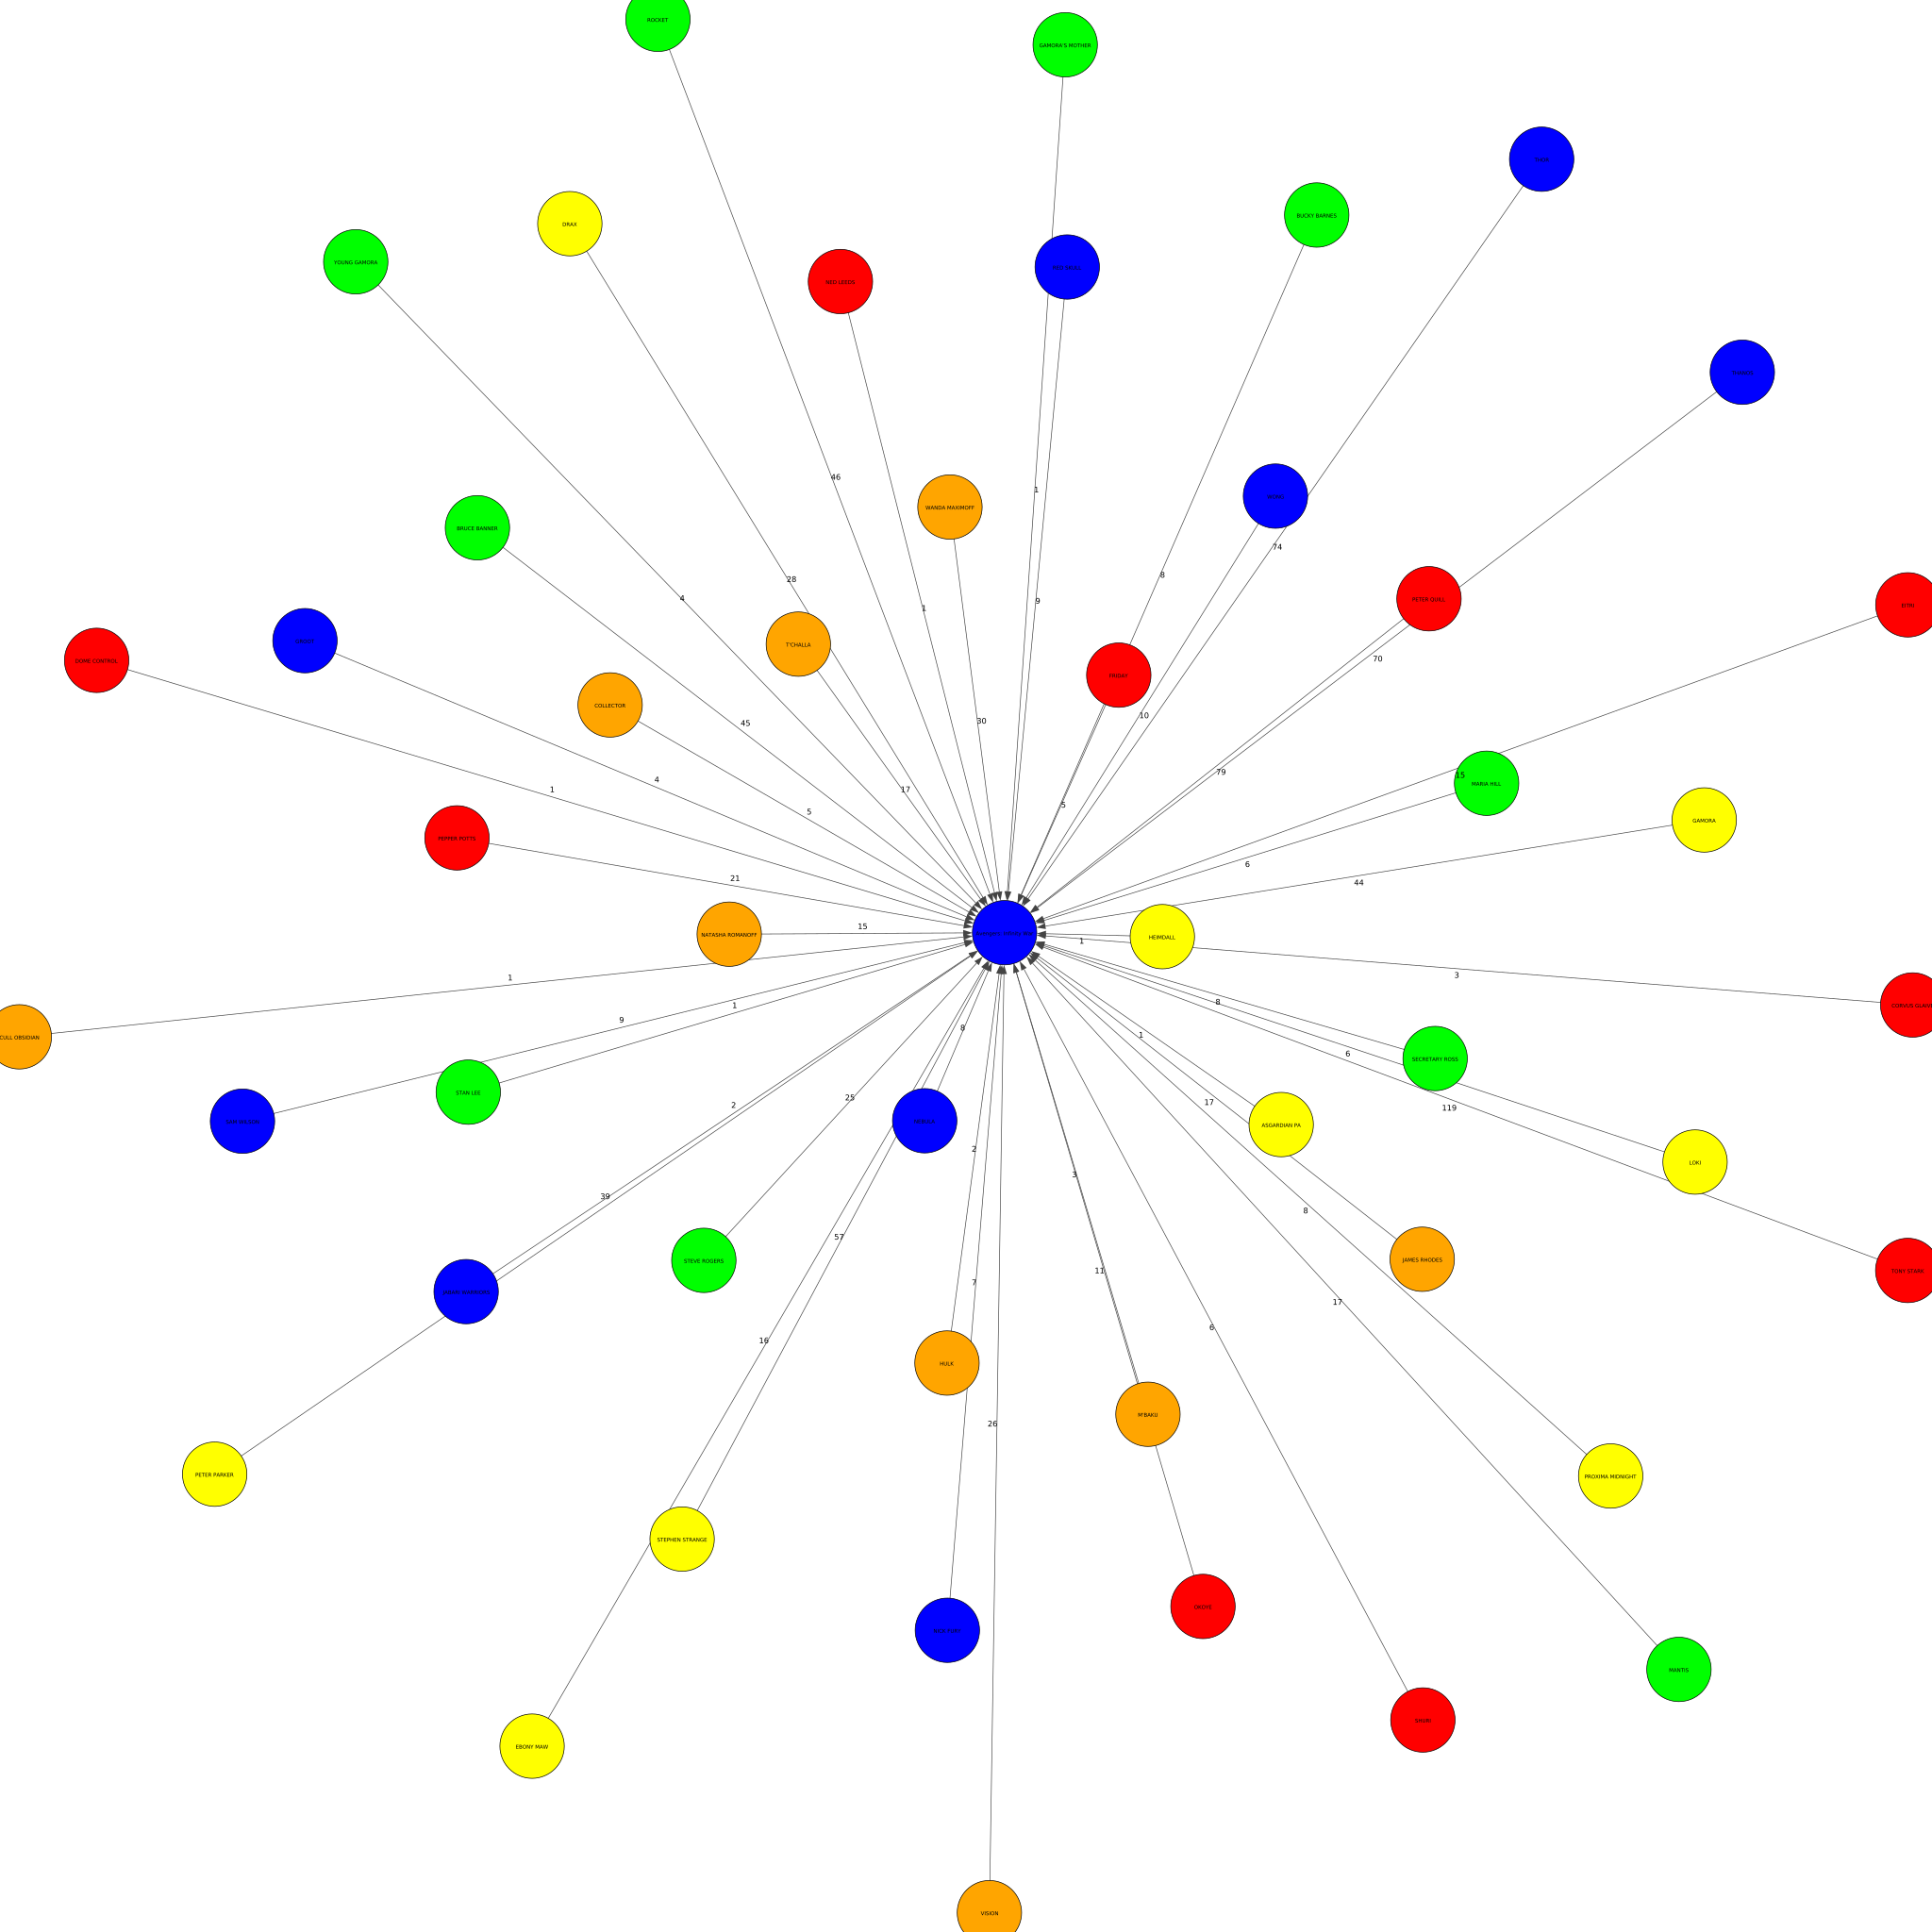

In [211]:
g = Graph(directed=True)

g.add_vertices(numero_nos)

i = 0
for personagem in personagens:
    g.vs[i]["id"]= personagem
    g.vs[i]["label"]= personagem   
    i+=1

for filme in filmes:
    g.vs[i]["id"]= filme
    g.vs[i]["label"]= filme   
    i+=1

        
g.vs['id']

edges = []
weights = []
index_personagem = 0
for (i, row) in df.iterrows():
    j = 0
    for column in filmes:
        if row[column] > 0:
            relation = (index_personagem, numero_personagens + j)
            edges.append(relation)
            weights.append(row[column])
        j += 1
    index_personagem+=1

edges
g.add_edges(edges)
g.es['weight'] = weights
g.es['label'] = weights



visual_style = {}
out_name = "graph.png"
# Set bbox and margin
visual_style["bbox"] = (3000,3000)
visual_style["margin"] = 30
# Set vertex colours
visual_style["vertex_color"]  = ["red", "green", "blue", "yellow", "orange"]
# Set vertex size
visual_style["vertex_size"] = 100
# Set vertex lable size
visual_style["vertex_label_size"] = 8
# Don't curve the edges
visual_style["edge_curved"] = False
# Set the layout
my_layout = g.layout_lgl()
visual_style["layout"] = my_layout
# Plot the graph
plot(g, out_name, **visual_style)